In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_RiskFactor = pd.read_csv('/Users/user/Documents/NPOWER_Folder/NPower_Project_Data_Cleaning/Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_presentdate.csv')

In [3]:
df_RiskFactor.head()

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2019,US,National Median (States and DC),Tobacco Use – Survey Data,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,BRFSS,NaN,%,Percentage,...,NaN,BEH,101BEH,169QUP,1GEN,8AGE,6RAC,6EDU,BRF05,5
1,2019,NC,North Carolina,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,"(35.466220975000454, -79.15925046299964)",BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF71,71
2,2019,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,BRFSS,NaN,%,Percentage,...,"(35.68094058000048, -85.77449091399967)",BEH,150BEH,177SCU,1GEN,8AGE,1RAC,6EDU,BRF71,71
3,2019,NH,New Hampshire,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Frequency,BRFSS,Every Day,%,Percentage,...,"(43.65595011300047, -71.50036091999965)",BEH,100BEH,166SSP,3GEN,8AGE,6RAC,6EDU,BRF25,25
4,2019,FL,Florida,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(28.932040377000476, -81.92896053899966)",BEH,100BEH,110CSA,1GEN,8AGE,6RAC,6EDU,BRF20,20


# Find the number of Rows of the Dataset

In [4]:
df_RiskFactor.shape[0]

38671

# Find the number of Columns of the Dataset

In [5]:
df_RiskFactor.shape[1]

31

In [6]:
df_RiskFactor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38671 entries, 0 to 38670
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        38671 non-null  int64  
 1   LocationAbbr                38671 non-null  object 
 2   LocationDesc                38671 non-null  object 
 3   TopicType                   38671 non-null  object 
 4   TopicDesc                   38671 non-null  object 
 5   MeasureDesc                 38671 non-null  object 
 6   DataSource                  38671 non-null  object 
 7   Response                    15018 non-null  object 
 8   Data_Value_Unit             38671 non-null  object 
 9   Data_Value_Type             38671 non-null  object 
 10  Data_Value                  36837 non-null  float64
 11  Data_Value_Footnote_Symbol  1834 non-null   object 
 12  Data_Value_Footnote         1834 non-null   object 
 13  Data_Value_Std_Err          367

In [7]:
df_RiskFactor.describe()

,Year,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,38671.000000,36837.000000,36759.000000,36759.000000,36759.000000,36759.000000,38671.000000
mean,2015.227069,27.007951,1.669858,23.733317,30.252678,3003.485106,46.253859
std,2.508775,25.727483,1.664721,24.828265,26.939649,3420.743498,24.798867
min,2011.000000,0.000000,0.000000,0.000000,0.000000,50.000000,5.000000
25%,2013.000000,5.500000,0.600000,3.700000,7.300000,553.000000,24.000000
50%,2016.000000,18.700000,1.100000,15.800000,21.200000,1953.000000,50.000000
75%,2017.000000,45.600000,2.200000,37.200000,52.400000,4231.000000,70.000000
max,2019.000000,99.900000,16.600000,99.800000,100.000000,35248.000000,81.000000


In [8]:
df_RiskFactor['Year'].min()

2011

In [9]:
def show_missing(df_RiskFactor):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df_RiskFactor.columns:
        variables.append(item)
        dtypes.append(df_RiskFactor[item].dtype)
        count.append(len(df_RiskFactor[item]))
        unique.append(len(df_RiskFactor[item].unique()))
        missing.append(df_RiskFactor[item].isna().sum())
        pc_missing.append(round((df_RiskFactor[item].isna().sum() / len(df_RiskFactor[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [10]:
show_missing(df_RiskFactor)

,variable,dtype,count,unique,missing,pc_missing
0,Year,int64,38671,9,0,0.00
1,LocationAbbr,object,38671,54,0,0.00
2,LocationDesc,object,38671,54,0,0.00
3,TopicType,object,38671,1,0,0.00
4,TopicDesc,object,38671,4,0,0.00
5,MeasureDesc,object,38671,8,0,0.00
6,DataSource,object,38671,1,0,0.00
7,Response,object,38671,7,23653,61.16
8,Data_Value_Unit,object,38671,1,0,0.00
9,Data_Value_Type,object,38671,1,0,0.00


In [11]:
#Drop a particular Table that is not needed

columns = ['Data_Value_Type','DataSource', 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol','GeoLocation', 'Data_Value_Unit']
df_columns_dropped = df_RiskFactor.drop(columns, axis=1)
df_columns_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38671 entries, 0 to 38670
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   38671 non-null  int64  
 1   LocationAbbr           38671 non-null  object 
 2   LocationDesc           38671 non-null  object 
 3   TopicType              38671 non-null  object 
 4   TopicDesc              38671 non-null  object 
 5   MeasureDesc            38671 non-null  object 
 6   Response               15018 non-null  object 
 7   Data_Value             36837 non-null  float64
 8   Data_Value_Std_Err     36759 non-null  float64
 9   Low_Confidence_Limit   36759 non-null  float64
 10  High_Confidence_Limit  36759 non-null  float64
 11  Sample_Size            36759 non-null  float64
 12  Gender                 38671 non-null  object 
 13  Race                   38671 non-null  object 
 14  Age                    38671 non-null  object 
 15  Ed

In [12]:
def show_missing(df_columns_dropped):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df_columns_dropped.columns:
        variables.append(item)
        dtypes.append(df_columns_dropped[item].dtype)
        count.append(len(df_columns_dropped[item]))
        unique.append(len(df_columns_dropped[item].unique()))
        missing.append(df_columns_dropped[item].isna().sum())
        pc_missing.append(round((df_columns_dropped[item].isna().sum() / len(df_columns_dropped[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [13]:
show_missing(df_columns_dropped)

,variable,dtype,count,unique,missing,pc_missing
0,Year,int64,38671,9,0,0.00
1,LocationAbbr,object,38671,54,0,0.00
2,LocationDesc,object,38671,54,0,0.00
3,TopicType,object,38671,1,0,0.00
4,TopicDesc,object,38671,4,0,0.00
5,MeasureDesc,object,38671,8,0,0.00
6,Response,object,38671,7,23653,61.16
7,Data_Value,float64,38671,996,1834,4.74
8,Data_Value_Std_Err,float64,38671,132,1912,4.94
9,Low_Confidence_Limit,float64,38671,990,1912,4.94


In [14]:
df_columns_dropped.head()

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,...,Education,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2019,US,National Median (States and DC),Tobacco Use – Survey Data,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,60.8,NaN,NaN,...,All Grades,BEH,101BEH,169QUP,1GEN,8AGE,6RAC,6EDU,BRF05,5
1,2019,NC,North Carolina,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,NaN,0.9,0.5,0.0,...,All Grades,BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF71,71
2,2019,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,NaN,3.5,0.9,1.7,...,All Grades,BEH,150BEH,177SCU,1GEN,8AGE,1RAC,6EDU,BRF71,71
3,2019,NH,New Hampshire,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,3.1,70.2,...,All Grades,BEH,100BEH,166SSP,3GEN,8AGE,6RAC,6EDU,BRF25,25
4,2019,FL,Florida,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,NaN,14.8,0.6,13.7,...,All Grades,BEH,100BEH,110CSA,1GEN,8AGE,6RAC,6EDU,BRF20,20


In [15]:
df_columns_dropped.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38666    False
38667    False
38668    False
38669    False
38670    False
Length: 38671, dtype: bool

In [16]:
#df_columns_dropped['Response']
df_columns_dropped['Response'].isnull()

0         True
1         True
2         True
3        False
4         True
         ...  
38666    False
38667     True
38668     True
38669    False
38670     True
Name: Response, Length: 38671, dtype: bool

In [17]:
df_columns_dropped['Response'].value_counts()

Current        3300
Every Day      3279
Some Days      3279
Former         1860
Never          1860
Not Current    1440
Name: Response, dtype: int64

In [18]:
df_columns_dropped['Response'].replace(['Current','Every Day', 'Former', 'Never','Not Current','Some Days'],[1,2,3,4,5,6],inplace=True)

In [19]:
df_columns_dropped['Response'] = df_columns_dropped['Response'].fillna(df_columns_dropped['Response'].mode()[0])

In [20]:
df_columns_dropped['Data_Value'].fillna(value = df_columns_dropped.Data_Value.mean(), inplace = True)
df_rounded = df_columns_dropped['Data_Value'].round(1)
#df_columns_dropped['Data_Value'].isnull().sum()

In [21]:
df_columns_dropped['Data_Value_Std_Err'].fillna(value = df_columns_dropped.Data_Value_Std_Err.mean(), inplace = True)
df_rounded = df_columns_dropped['Data_Value_Std_Err'].round(1)
#df_columns_dropped['Data_Value_Std_Err'].isnull().sum()

In [22]:
df_columns_dropped['Low_Confidence_Limit'].fillna(value = df_columns_dropped.Low_Confidence_Limit.mean(), inplace = True)
df_rounded = df_columns_dropped['Low_Confidence_Limit'].round(1)
#df_columns_dropped['Low_Confidence_Limit'].isnull().sum()

In [23]:
df_columns_dropped['High_Confidence_Limit'].fillna(value = df_columns_dropped.High_Confidence_Limit.mean(), inplace = True)
df_rounded = df_columns_dropped['High_Confidence_Limit'].round(1)
#df_columns_dropped['High_Confidence_Limit'].isnull().sum()

In [24]:
df_columns_dropped['Sample_Size'].fillna(value = df_columns_dropped.Sample_Size.mean(), inplace = True)
df_rounded = df_columns_dropped['Sample_Size'].round(1)
#df_columns_dropped['Sample_Size'].isnull().sum()

In [25]:
df_columns_dropped

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,...,Education,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2019,US,National Median (States and DC),Tobacco Use – Survey Data,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,1.0,60.8,1.669858,23.733317,...,All Grades,BEH,101BEH,169QUP,1GEN,8AGE,6RAC,6EDU,BRF05,5
1,2019,NC,North Carolina,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,0.9,0.500000,0.000000,...,All Grades,BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF71,71
2,2019,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,3.5,0.900000,1.700000,...,All Grades,BEH,150BEH,177SCU,1GEN,8AGE,1RAC,6EDU,BRF71,71
3,2019,NH,New Hampshire,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Frequency,2.0,76.3,3.100000,70.200000,...,All Grades,BEH,100BEH,166SSP,3GEN,8AGE,6RAC,6EDU,BRF25,25
4,2019,FL,Florida,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,1.0,14.8,0.600000,13.700000,...,All Grades,BEH,100BEH,110CSA,1GEN,8AGE,6RAC,6EDU,BRF20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38666,2011,CA,California,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,4.0,62.5,0.500000,61.500000,...,All Grades,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF29,29
38667,2011,NV,Nevada,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,1.6,0.300000,1.000000,...,All Grades,BEH,150BEH,177SCU,1GEN,3AGE,6RAC,6EDU,BRF70,70
38668,2011,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,11.9,1.500000,8.900000,...,All Grades,BEH,150BEH,177SCU,2GEN,8AGE,6RAC,6EDU,BRF68,68
38669,2012,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Frequency of Use,6.0,31.4,4.100000,23.400000,...,All Grades,BEH,150BEH,178SFU,2GEN,8AGE,6RAC,6EDU,BRF79,79


In [26]:
#df_columns_dropped['Response'].isnull()

In [27]:
df_columns_dropped

,Year,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,Response,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,...,Education,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2019,US,National Median (States and DC),Tobacco Use – Survey Data,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,1.0,60.8,1.669858,23.733317,...,All Grades,BEH,101BEH,169QUP,1GEN,8AGE,6RAC,6EDU,BRF05,5
1,2019,NC,North Carolina,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,0.9,0.500000,0.000000,...,All Grades,BEH,150BEH,177SCU,1GEN,8AGE,4RAC,6EDU,BRF71,71
2,2019,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,3.5,0.900000,1.700000,...,All Grades,BEH,150BEH,177SCU,1GEN,8AGE,1RAC,6EDU,BRF71,71
3,2019,NH,New Hampshire,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Frequency,2.0,76.3,3.100000,70.200000,...,All Grades,BEH,100BEH,166SSP,3GEN,8AGE,6RAC,6EDU,BRF25,25
4,2019,FL,Florida,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,1.0,14.8,0.600000,13.700000,...,All Grades,BEH,100BEH,110CSA,1GEN,8AGE,6RAC,6EDU,BRF20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38666,2011,CA,California,Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,4.0,62.5,0.500000,61.500000,...,All Grades,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF29,29
38667,2011,NV,Nevada,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,1.6,0.300000,1.000000,...,All Grades,BEH,150BEH,177SCU,1GEN,3AGE,6RAC,6EDU,BRF70,70
38668,2011,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,1.0,11.9,1.500000,8.900000,...,All Grades,BEH,150BEH,177SCU,2GEN,8AGE,6RAC,6EDU,BRF68,68
38669,2012,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Frequency of Use,6.0,31.4,4.100000,23.400000,...,All Grades,BEH,150BEH,178SFU,2GEN,8AGE,6RAC,6EDU,BRF79,79


/var/folders/x5/3hp902z954jdrkn5vlkx3zyh0000gn/T/ipykernel_6194/2083157315.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_columns_dropped.corr()


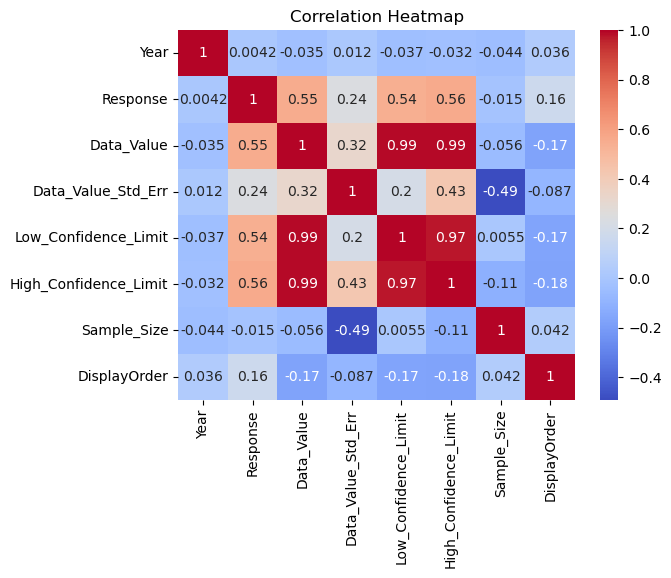

In [28]:
correlation_matrix = df_columns_dropped.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
#Check if there is any null values
df_columns_dropped.isnull().sum()

Year                     0
LocationAbbr             0
LocationDesc             0
TopicType                0
TopicDesc                0
MeasureDesc              0
Response                 0
Data_Value               0
Data_Value_Std_Err       0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Sample_Size              0
Gender                   0
Race                     0
Age                      0
Education                0
TopicTypeId              0
TopicId                  0
MeasureId                0
StratificationID1        0
StratificationID2        0
StratificationID3        0
StratificationID4        0
SubMeasureID             0
DisplayOrder             0
dtype: int64

In [30]:
#Check the data types
df_columns_dropped.dtypes

Year                       int64
LocationAbbr              object
LocationDesc              object
TopicType                 object
TopicDesc                 object
MeasureDesc               object
Response                 float64
Data_Value               float64
Data_Value_Std_Err       float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
Sample_Size              float64
Gender                    object
Race                      object
Age                       object
Education                 object
TopicTypeId               object
TopicId                   object
MeasureId                 object
StratificationID1         object
StratificationID2         object
StratificationID3         object
StratificationID4         object
SubMeasureID              object
DisplayOrder               int64
dtype: object

In [31]:
#Get training and test feature data, Defining training feature

Xdata = df_columns_dropped.drop(columns = 'Data_Value')
numericalCols = Xdata.select_dtypes(exclude = ['object']).columns
X = Xdata[numericalCols]
X

,Year,Response,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,2019,1.0,1.669858,23.733317,30.252678,3003.485106,5
1,2019,1.0,0.500000,0.000000,1.800000,385.000000,71
2,2019,1.0,0.900000,1.700000,5.300000,662.000000,71
3,2019,2.0,3.100000,70.200000,82.400000,357.000000,25
4,2019,1.0,0.600000,13.700000,15.900000,15824.000000,20
...,...,...,...,...,...,...,...
38666,2011,4.0,0.500000,61.500000,63.500000,17985.000000,29
38667,2011,1.0,0.300000,1.000000,2.200000,2157.000000,70
38668,2011,1.0,1.500000,8.900000,14.900000,1832.000000,68
38669,2012,6.0,4.100000,23.400000,39.400000,203.000000,79


In [32]:
#Define testing feature
y = df_columns_dropped['Data_Value']

In [33]:
#Scaling the Independent Variable(features)
from sklearn.preprocessing import scale
Cols = X.columns
X.columns = Cols
X

,Year,Response,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,2019,1.0,1.669858,23.733317,30.252678,3003.485106,5
1,2019,1.0,0.500000,0.000000,1.800000,385.000000,71
2,2019,1.0,0.900000,1.700000,5.300000,662.000000,71
3,2019,2.0,3.100000,70.200000,82.400000,357.000000,25
4,2019,1.0,0.600000,13.700000,15.900000,15824.000000,20
...,...,...,...,...,...,...,...
38666,2011,4.0,0.500000,61.500000,63.500000,17985.000000,29
38667,2011,1.0,0.300000,1.000000,2.200000,2157.000000,70
38668,2011,1.0,1.500000,8.900000,14.900000,1832.000000,68
38669,2012,6.0,4.100000,23.400000,39.400000,203.000000,79


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test

,Year,Response,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
29642,2013,1.0,1.669858,23.733317,30.252678,3003.485106,69
21553,2013,1.0,0.900000,57.900000,61.500000,5681.000000,5
32999,2015,4.0,1.200000,53.100000,57.700000,3966.000000,29
6471,2017,1.0,2.200000,18.200000,26.800000,752.000000,21
34768,2011,1.0,4.400000,19.900000,37.300000,570.000000,24
...,...,...,...,...,...,...,...
23953,2016,1.0,0.800000,12.900000,15.900000,4048.000000,24
16398,2016,1.0,3.200000,38.100000,50.500000,345.000000,9
28767,2016,2.0,3.600000,59.100000,73.100000,454.000000,25
35147,2012,1.0,0.600000,5.500000,7.900000,4755.000000,71


In [36]:
model_test = LinearRegression()
model_test.fit(X_test, y_test)

LinearRegression()

In [37]:
r_sq_test = model_test.score(X, y)
print('coefficient of determination:', r_sq_test * 100)

coefficient of determination: 99.66069388106327


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq * 100)

coefficient of determination: 99.66089076083226


In [40]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.2739243202228927
slope: [ 1.69079962e-04  4.25297101e-02 -1.41143789e+00  1.41008551e-01
  8.57471067e-01 -5.84099817e-07 -1.46242956e-03]


In [41]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[27.03140786  0.84364943  3.51977575 ... 11.92224809 31.50285712
 22.04248127]


In [42]:
# Assuming you have a DataFrame called 'df' containing the analyzed data
df_columns_dropped.to_csv('NewTobacco_Analyzed_data.csv', index=False)